# Project: No show Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    Does every one who recieves an SMS go to their appointment?<br />  
    Is age a factor for non showing up ?
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [21]:

df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
df.shape

(110527, 14)

14 columns 110527 rows

Now we got to rename the "No-show" cause its gonna be easier to call if we replaced the dash with an underscore

In [23]:
df = df.rename({'No-show': 'No_show'}, axis=1)

Now that we renamed it lets check it out

In [24]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
df.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

Looks like approxmately only fifth of the patients miss out on their appointments 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there's no missing cells in our data....

In [27]:
df.duplicated().sum()

0

also there's no duplicated rows in our datasaet 

looks like our data is clean and good to go no additional wrangling required


### Data Cleaning 

data is made up of 14 columns No_show is dependent variable and the rest is independent

we just need to drop the first two columns which are system generated and for identification purposes only

In [28]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

Let's check

In [29]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


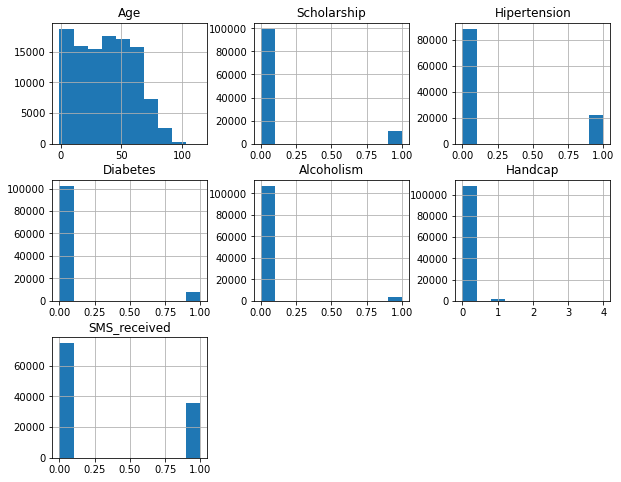

In [30]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis


### Does every one who recieves an SMS go to their appointment?

Text(0.5, 1.0, 'SMS distribution')

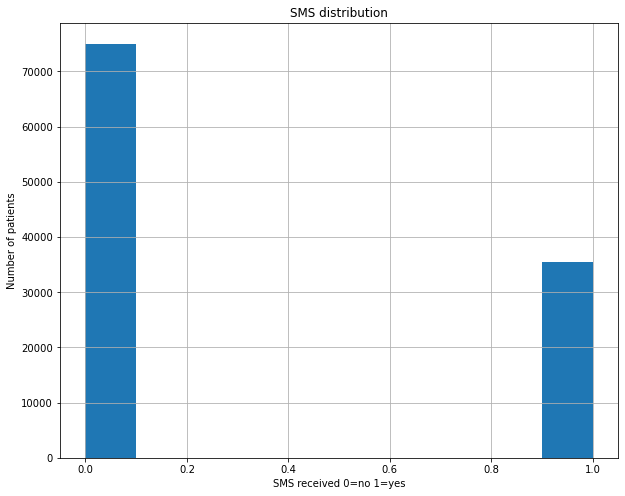

In [40]:

df.SMS_received.hist(figsize=(10,8));
plt.xlabel('SMS received 0=no 1=yes')
plt.ylabel('Number of patients')
plt.title('SMS distribution')

we see here that most people didnt actualy recieve a SMS

In [32]:
show = df['No_show'] == 'No'
noshow = df['No_show'] == 'Yes'

Text(0.5, 1.0, 'Relationship between SMS distribution and No show')

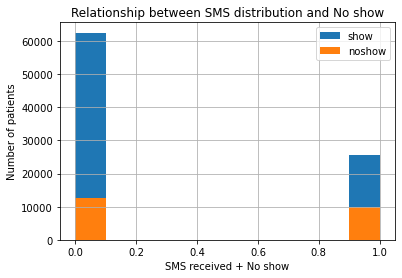

In [41]:
df.SMS_received[show].hist(label='show');
df.SMS_received[noshow].hist(label='noshow');
plt.legend();
plt.xlabel('SMS received + No show')
plt.ylabel('Number of patients')
plt.title('Relationship between SMS distribution and No show')

We see here that the majorty of people didnt recieve an SMS but more than 60% of those who recieved it show up to their appoimtments

### Is age a factor for non showing up ?

Text(0.5, 1.0, 'Age distribution')

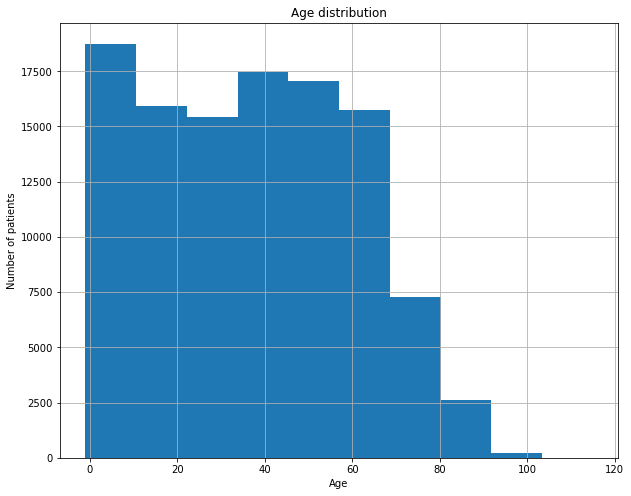

In [42]:

df.Age.hist(figsize=(10,8));
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age distribution')

As we can see here the histogram is more scewed to the right which indicates that most patients are new born babies, Is this correlated with showing up?

In [35]:

noshow = df['No_show'] == 'Yes'
show = df['No_show'] == 'No'

Text(0.5, 1.0, 'Relationship between Age and No show')

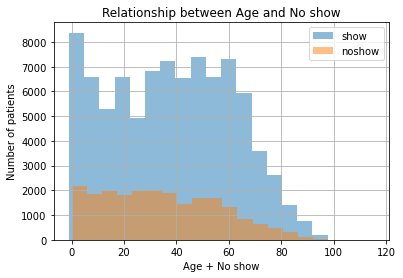

In [43]:
df.Age[show].hist(alpha=0.5, label='show', bins=20);
df.Age[noshow].hist(alpha=0.5, label='noshow', bins=20);
plt.legend();
plt.xlabel('Age + No show')
plt.ylabel('Number of patients')
plt.title('Relationship between Age and No show')

It's notable that the most showing up is either when a pateint is very young or relatively old . which indicates that the youth are more likely to skip on their appointments

<a id='conclusions'></a>
## Conclusions

> we can predict wether a patient is going to show up to their apointment or not by looking at their age teenagers and people who are below 40 have bigger chances of not showing up . also sending an SMS increase the chances of patients coming to their appointments in time. so its we advise to implement this more especially with middle aged patients.

>one limitation though that could make the analysis not clear is the use of the handicap word as there's a crippling handicap and a non crippling handicap and it makes a big diffrence in whether the patient shows up to the appointment or not 

